## Drag Polar estimation through Drag Build-up method

The dcl/dalpha slope is 0.029488143147638743
1.0988 37.862434412998496
The leading edge sweep is: 21.19571251545713
The leading edge sweep is: 21.19571251545713
The lower limit AR for High AR DATCOM method is: 2.8601536001811767
The leading edge sweep is: 21.19571251545713
The CL_max is: 1.0988
37.862434412998496


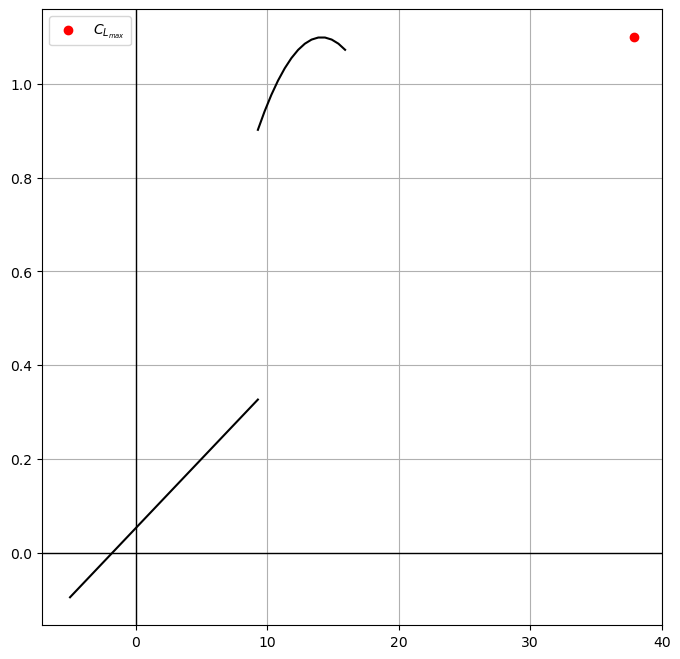

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ambiance import Atmosphere
from task2v2 import *

In [2]:
# Variables
kn_factor = .5144444
ft_factor = 3.281
MTOW = 43090 #kg
OEW = 24593 #kg
fuel_weight = 8832 #kg
b = 28.08
S = 93.5
c4_sweep = np.radians(17.45)
tr = 0.235
L_fus = 35.50 #m
d_fus = 3.30 # m
V_app = 128/kn_factor # knots
h_app = 0
V_cr = 430*kn_factor  # knots
h_cruise = 30000 / ft_factor # ft


### Parasite drag estimation

Here we need to consider only for the contribution of the wing and of the fuselage. 

In [3]:
# Do not consider miscleanous drag
C_dmisc = 0

In [4]:
# Cruise parameters
print(h_cruise)
atmosphere = Atmosphere(h_cruise)
kin_visc = atmosphere.kinematic_viscosity
dyn_visc = atmosphere.dynamic_viscosity
rho = atmosphere.density

a = atmosphere.speed_of_sound
M = V_cr/a[0]
kin_visc, dyn_visc, rho

9143.553794574824


(array([3.24052118e-05]), array([1.48761059e-05]), array([0.45906523]))

### Fuselage component

In [5]:
# 0.05% of the fuselage is laminar
laminar_fus = 0.05

k = 0.634e-5
Re = 2.56e7#V_cr*c/kin_visc

# Laminar friction coefficient
C_f_lamFus = 1.328/np.sqrt(Re)

# Turbolent friction coefficient
C_f_turbFus = 0.455/((np.log10(Re)**(2.58))*(1+0.144*M**2)**0.65)

# Total friction coefficient weighted
C_fFus = laminar_fus * C_f_lamFus + (1-laminar_fus) * C_f_turbFus

In [6]:
f_fus = L_fus/np.sqrt(d_fus**2)
FF_fus = (1+ 60/f_fus**3 + f_fus/ 400)
FF_fus

1.0750896081495798

#### Interference factor

In [7]:
IF_fus = 1.0 # tbd

#### Wet area

In [8]:
L1_fus = 1.99978
L2_fus = 28.44
L3_fus = 5.06

S_wet_fus = (np.pi * d_fus / 4) * ((1 / (3 * L1_fus**2)) * ((4 * L1_fus**2 + d_fus**2 / 4)**1.5 - d_fus**3 / 8)) - d_fus + 4 * L2_fus + 2 * np.sqrt(L3_fus**2 + d_fus**2 / 4)

S_wet_fus

137.6301171676473

### Wing component

In [9]:
c = 3.755

In [31]:
def angle_at_xdivc(x, c, LEsweep, c_r, tr, b):
    return np.arctan(np.tan(LEsweep) - (x/c)  * 2 * (c_r/b) * (1-tr))

In [36]:
laminar_wing = 0.1
# NACA 64(1)-212
x_c_m = 0.4
ttoc = 0.12
print(LE_sweep)
lambda_m  = angle_at_xdivc(4, 10, np.radians(LE_sweep), c_r, tr, b)

print(np.degrees(lambda_m), lambda_m)
k = 0.634e-5 # paint factor
Re = 2.56e7#V_cr*c/kin_visc

# Laminar friction coefficient
C_f_lamwing = 1.328/np.sqrt(Re)

# Turbolent friction coefficient
C_f_turbwing = 0.455/((np.log10(Re)**(2.58))*(1+0.144*M**2)**0.65)

# Total friction coefficient weighted
C_fwing = laminar_wing * C_f_lamwing + (1-laminar_wing) * C_f_turbwing
C_f_lamwing, C_f_turbwing, C_fwing

21.19571251545713
15.124014377256355 0.2639638470020832


(0.0002624690457939755, 0.002473444218208737, 0.002252346700967261)

#### Form factor

In [12]:
FF_wing = (1+ (0.6 / x_c_m) * ttoc + 100*ttoc**4)*(1.34*M**0.18*np.cos(lambda_m)**0.28)
FF_wing

1.353316845597582

#### Interference factor

In [13]:
IF_wing = 1.4 # 1.1 - 1.4

#### S_{wet}

In [14]:
S_wet_wing = 2*1.07*S
S_wet_wing

200.09

## Wave drag

### Final form drag estimation

In [18]:
q = 0.5*rho*V_cr**2
C_Ldes = 1.1*(1/q)*((MTOW + (MTOW-fuel_weight))/2)*9.81*1/S
print(C_Ldes)
M_DD = 0.935/(math.cos(c4_sweep)) - (0.12)/((math.cos(c4_sweep)**2)) - 0.56/(10*((math.cos(c4_sweep)**3)))
M_DD, M

[0.39738455]


(0.7837465384179368, 0.7295108819052281)

In [20]:
DeltaCD = 0.002*(1+2.5*(M_DD-M)/0.05)**(-1)
DeltaCD

0.0005388246279353938

In [21]:
CD_0 = (1/S)*(FF_fus*IF_fus*C_fFus*S_wet_fus+C_fwing*FF_wing*IF_wing*S_wet_wing) + DeltaCD
print(f"CD0 of the fuselafe and the aircraft without any compressibility effects and miscellaneuous drag is: {np.round(CD_0, 7)}")

CD0 of the fuselafe and the aircraft without any compressibility effects and miscellaneuous drag is: 0.0134104


In [109]:
e = 4.61 * (1 - 0.045 * AR**0.68) * (np.cos(np.radians(LE_sweep))**0.15) - 3.1
e

0.5867956398330709